##### Problem Statement: 
Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the potential

##### Analysis to be done: 
The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.



##### Data Dictionary:

|Variables|Description|
|:-|:-|
|App| Application name|
|Category|Category to which the app belongs|
|Rating|Overall user rating of the app|
|Reviews|Number of user reviews for the app|
|Size|Size of the app|
|Installs|Number of user downloads/installs for the app|
|Type|Paid or Free|
|Price|Price of the app|
|Content Rating|Age group the app is targeted at - Children / Mature 21+ / Adult|
|Genres|An app can belong to multiple genres (apart from its main category)<br>For example, a musical family game will belong to Music, Game, Family genres|
|Last Updated|Date when the app was last updated on Play Store|
|Current Ver|Current version of the app available on Play Store|
|Android Ver|Minimum required Android version|


##### Solution:

##### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

##### Import and Check data

In [2]:
df=pd.read_csv("/Users/muskansharma/Downloads/machine learning /googleplaystore.csv") 

In [3]:
#checking first five rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Check number of columns and rows, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.shape

(10841, 13)

##### Finding and Treating Null Values

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#Dropping the records with null ratings
#This is done because ratings is our target variable
df.dropna(how='any', inplace=True)

In [9]:
df.shape

(9360, 13)

In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##### Handling the Variables

##### 1. Clean the price column

In [11]:
#Cleaning the price column
df.Price.value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

#### Observations
Some have dollars, some have 0
* We need to conditionally handle this.
* First, let's modify the column to take 0 if value is 0, else take the first letter onwards.

In [12]:
#Modifying the column
df['Price'] = df.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [13]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

**The other columns with numeric data are:<br>**
1. Reviews
2. Installs
3. Size

**2. Convert reviews to numeric**

In [14]:
#Converting reviews to numeric
df.Reviews = df.Reviews.astype("int32")

In [15]:
df.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

**3. Handle the installs column**

In [16]:
#Handling the installs column
df.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

We'll need to remove the commas and the plus signs.

<b> Defining function for the same </b>

In [17]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [18]:
df.Installs = df.Installs.map(clean_installs)

In [19]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

**4. Handle the app size field**

In [20]:
#Handling the app size field
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [21]:
df["Size"] = df["Size"].map(change_size)

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
#Filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

#### **Sanity checks**

1. Average rating should be between 1 and 5, as only these values are allowed on Play Store. Drop any rows that have a value outside this range.

In [24]:
#Checking the rating
df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### <b> Observations </b>

Min is 1 and max is 5. None of the values have rating outside the range.

2. Reviews should not be more than installs as only those who installed can review the app.

In [25]:
#Checking and counting the rows
len(df[df.Reviews > df.Installs])

7

In [26]:
df[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [27]:
#copy is copying only those rows that satisfy the condition and removing rest.
df = df[df.Reviews <= df.Installs].copy()

In [28]:
df.shape

(9353, 13)

3. For free apps **(Type == “Free”)**, the price should not be **> 0**. Drop any such rows.

In [29]:
len(df[(df.Type == "Free") & (df.Price>0)])

0

### **Exploratory Data Analysis**

#### <b> Box Plot: Price</b>

/Users/muskansharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


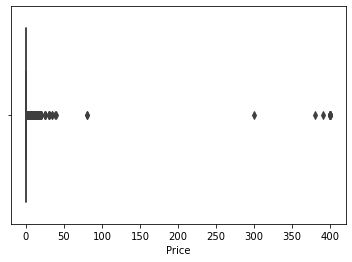

In [30]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(df.Price)
plt.show()

#### <b> Box Plot: Reviews</b>

/Users/muskansharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


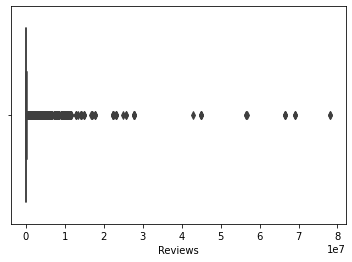

In [31]:
#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(df.Reviews)
plt.show()

#### **Checking Distribution and Skewness:**

How are the ratings distributed? Is it more toward higher ratings?

##### **Distribution of Ratings**

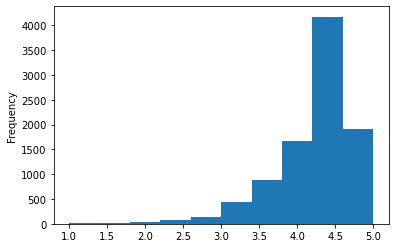

In [32]:
#Distributing the ratings
df['Rating'].plot(kind='hist')
#Show plot
plt.show()

##### **Histogram: Size**

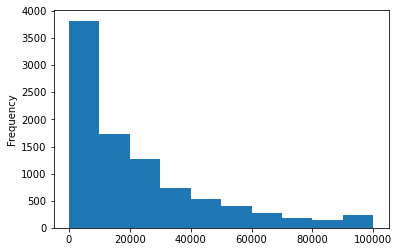

In [33]:
df['Size'].plot(kind='hist')
#Show plot
plt.show()

#### <b> Observations </b>
A histogram is plotted with ratings on the x-axis and frequency on the y-axis, and the ratings are distributed.

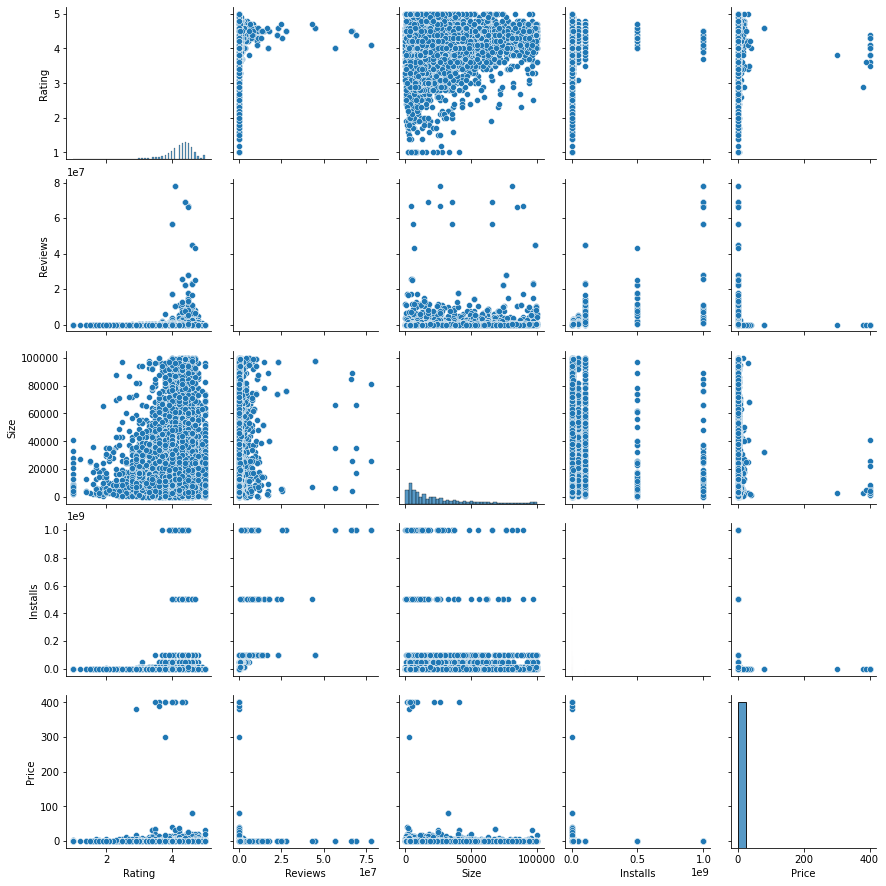

In [34]:
#Pair plot
sns.pairplot(data=df)

##### **Outlier Treatment:**

##### **1. Price:** 

From the box plot, it seems like there are some apps with very high prices. A price of $200 for an application on the Play Store is very high and suspicious.
Check the records that have very high price:
Is 200 a high price?

In [35]:
#Checking the records
len(df[df.Price > 200])

15

In [36]:
df[df.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [37]:
df = df[df.Price <= 200].copy()

df.shape

(9338, 13)

##### **2. Reviews:**

Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [38]:
#Dropping the records with more than 2 million reviews
df = df[df.Reviews <= 2000000]
df.shape

(8885, 13)

##### **3. Installs:**

There seem to be some outliers in this field too. Apps having a very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.

Decide a threshold as the cutoff for outliers and drop records having values more than the threshold.

In [39]:
#Dropping the apps that have a very high number of installs
df.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

#### <b> Observations </b>

Looks like there are just 1% of apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [40]:
#Dropping the apps with more than 100M installs
len(df[df.Installs >= 1000000000])

6

In [41]:
df = df[df.Installs < 1000000000].copy()
df.shape

(8879, 13)

In [42]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

#### **Bi-variate Analysis:**

Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relationhips between rating and the other features.

##### **1.	Make scatter plot/joint plot for Rating vs. Price**

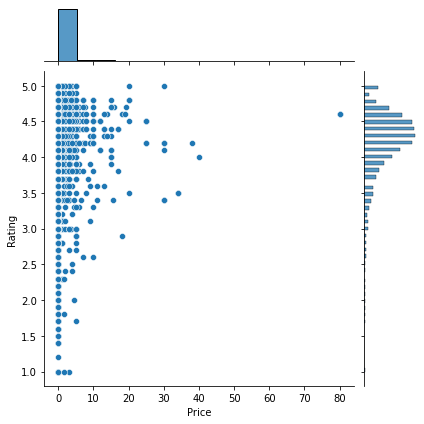

In [43]:
#What pattern do you observe? Does rating increase with price?
sns.jointplot(df.Price, df.Rating)

##### **2.	Make scatter plot/joint plot for Rating vs Size**

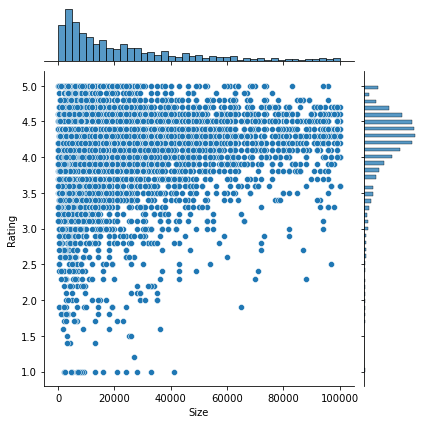

In [44]:
#Are heavier apps rated better?
sns.jointplot(df.Size, df.Rating)

##### **3.	Make scatter plot/joint plot for Rating vs Reviews**

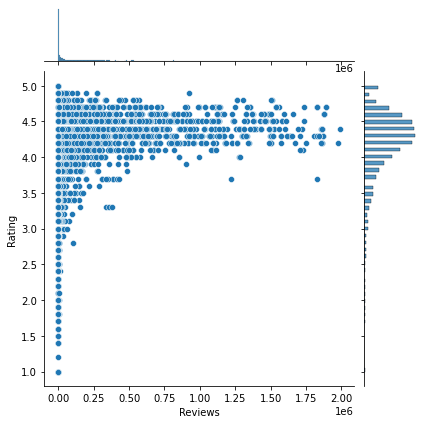

In [45]:
# Does more review mean a better rating always?
sns.jointplot(df.Reviews, df.Rating)

##### **4.	Make boxplot for Rating vs Content Rating**

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

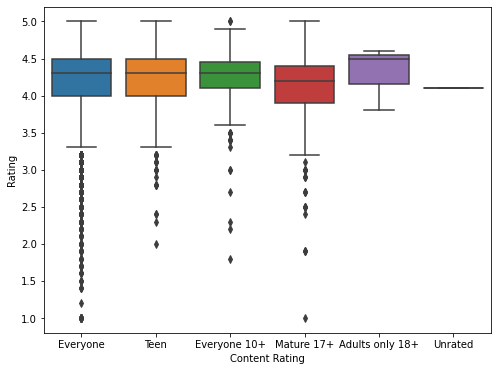

In [46]:
#Is there any difference in the ratings? Are some types liked better?
plt.figure(figsize=[8,6])
sns.boxplot(df['Content Rating'], df.Rating)

##### **5. Make boxplot for Ratings vs. Category**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

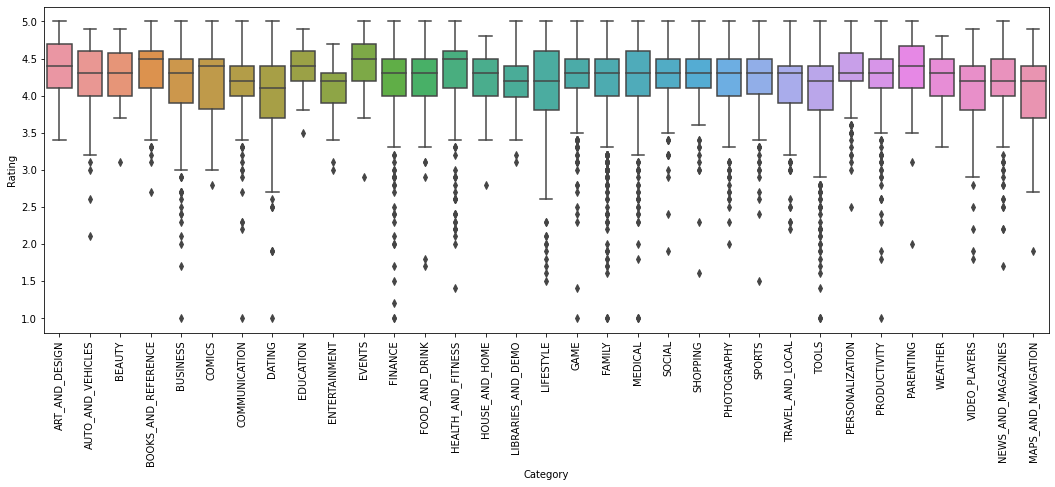

In [47]:
#Which genre has the best ratings?
plt.figure(figsize=[18,6])
g = sns.boxplot(df.Category, df.Rating)
plt.xticks(rotation=90)

### **Pre-processing the Dataset**

##### **1. Make a copy of the dataset**

In [48]:
#Making a copy
df1 = df.copy()

##### **2. Apply log transformation (np.log1p) to Reviews and Installs**

Reviews and Installs have some values that are still relatively very high.
Before building a linear regression model, you need to reduce the skew.

In [49]:
#Reducing the skew
df.Installs.describe()

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [50]:
df1.Installs = df1.Installs.apply(np.log1p)

In [51]:
df1.Reviews = df1.Reviews.apply(np.log1p)

In [52]:
df1.Installs.describe()

count    8879.000000
mean       11.981171
std         3.617244
min         1.791759
25%         9.210440
50%        13.122365
75%        15.424949
max        20.030119
Name: Installs, dtype: float64

In [53]:
df1.Reviews.describe()

count    8879.000000
mean        8.021438
std         3.568712
min         0.693147
25%         5.075174
50%         8.362175
75%        10.943675
max        14.501668
Name: Reviews, dtype: float64

##### **3. Drop columns App, Last Updated, Current Ver, and Android Ver**

 These variables are not useful for our task.

In [54]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [55]:
#Dropping the variables that are not useful for our task
df1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
df1.shape

(8879, 9)

##### **4. Dummy Columns:**


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric fields. Name of the dataframe should be **df2**.

In [56]:
df2 = pd.get_dummies(df1, drop_first=True)

In [57]:
df2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [58]:
df2.shape

(8879, 157)

#### **Train-test split**

Let us distribute the data into **training** and **test** datasets using the **train_test_split()** function.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
df_train, df_test = train_test_split(df2, train_size = 0.7, random_state = 100)

In [61]:
df_train.shape, df_test.shape

((6215, 157), (2664, 157))

Let us separate the dataframes into **X_train, y_train, X_test, y_test.**

In [62]:
y_train = df_train.pop("Rating")
X_train = df_train

In [63]:
X_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
1279,7.63627,6900.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y_test = df_test.pop("Rating")
X_test = df_test

In [65]:
X_test.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
1161,9.329456,24000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <b> **Regression Algorithms:**</b>

#### <b>Types of Regression Algorithms:</b>

* Linear regression
* Multiple linear regression
* Polynomial regression
* Ridge regression
* Lasso regression
* ElasticNet regression

#### **When to use regression?**

If target variable is a continuous numeric variable (100–2000), then use a regression algorithm.

#### **Import *statsmodels* Library for Linear Regression**

In [66]:
#Importing the statsmodel library
import statsmodels.api as sm

In [67]:
#Applying linear regression
model1 = sm.OLS(y_train, X_train)

In [68]:
model1 = model1.fit()

In [69]:
#Finding the summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3717.
Date:                Thu, 04 May 2023   Prob (F-statistic):                        0.00
Time:                        15:41:20   Log-Likelihood:                         -4281.7
No. Observations:                6215   AIC:                                      8811.
Df Residuals:                    6091   BIC:                                      9646.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1752      0.006     28.037      0.000       0.163       0.187
Size                                         -2.896e-07   3.37e-07     -0.859      0.391   -9.51e-07    3.72e-07
Installs                                        -0.1499      0.006    -24.184      0.000      -0.162      -0.138
Price                                            0.0006      0.003      0.177      0.860      -0.006       0.007
Category_AUTO_AND_VEHICLES                       1.6381      0.125     13.136      0.000       1.394       1.883
Category_BEAUTY                                  1.7213      0.128     13.462      0.000       1.471       1.972
Category_BOOKS_AND_REFERENCE                     1.6843      0.122     13.826      0.000       1.445       1.923
Category_BUSINESS                                1.6046      0.121     13.272      0.000       1.368       1.842
Category_COMICS                                  2.3786      0.226     10.517      0.000       1.935       2.822
Category_COMMUNICATION                           1.5478      0.121     12.765      0.000       1.310       1.786
Category_DATING                                  1.5013      0.122     12.262      0.000       1.261       1.741
Category_EDUCATION                               2.8642      0.251     11.419      0.000       2.373       3.356
Category_ENTERTAINMENT                           2.7757      0.251     11.065      0.000       2.284       3.267
Category_EVENTS                                  1.7447      0.126     13.792      0.000       1.497       1.993
Category_FAMILY                                  2.8988      0.243     11.920      0.000       2.422       3.376
Category_FINANCE                                 1.5685      0.121     12.976      0.000       1.332       1.806
Category_FOOD_AND_DRINK                          1.5993      0.123     13.006      0.000       1.358       1.840
Category_GAME                                    3.1390      0.241     13.046      0.000       2.667       3.611
Category_HEALTH_AND_FITNESS                      1.6296      0.121     13.464      0.000       1.392       1.867
Category_HOUSE_AND_HOME                          1.6151      0.124     13.002      0.000       1.372       1.859
Category_LIBRARIES_AND_DEMO                      1.6541      0.125     13.247      0.000       1.409       1.899
Category_LIFESTYLE                               1.5913      0.121     13.156      0.000       1.354       1.828
Category_MAPS_AND_NAVIGATION                     1.5212      0.123     12.399      0.000       1.281       1.762
Category_MEDICAL                              

#### **Prediction and evaluation using "model1"**

In [71]:
#Prediction and evaluation
import sklearn.metrics as metrics
y_test_pred= model1.predict(X_test)

In [72]:
#Assessing the model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.4920332628198254


Lower values of RMSE indicate better fit.

In [73]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100

print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: -2.5730378350636323


In [74]:
#Calculating MAPE
#Mean Absolute Percentage Error measures the prediction accuracy of a model.
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.490934337925152


#### **Reiterating the Model**

1. Feature selection using p-value:

In regression analysis, p-values and coefficients together indicate which relationships in the model are statistically significant and the nature of those relationships.


Coefficients describe the mathematical relationship between each independent variable and the dependent variable.

p-values for the coefficients indicate whether these relationships are statistically significant.

In general, the threshold for the p-value is taken as $\leq$ 0.05.


Let's find the variable with value $\leq$ 0.05.

**2. List:**

Identified 99 variables that have p-value $\leq$ 0.05.

In [80]:
df3=df2[['Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY','Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS',
'Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE',
'Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS','Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE','Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES','Category_PARENTING','Category_PERSONALIZATION',
'Category_PHOTOGRAPHY','Category_PRODUCTIVITY','Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL','Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content Rating_Everyone','Content Rating_Everyone 10+','Content Rating_Mature 17+',
'Content Rating_Teen','Content Rating_Unrated','Genres_Art & Design','Genres_Art & Design;Creativity','Genres_Art & Design;Pretend Play','Genres_Auto & Vehicles','Genres_Beauty','Genres_Board;Brain Games','Genres_Books & Reference', 
'Genres_Business','Genres_Casual','Genres_Casual;Action & Adventure','Genres_Casual;Brain Games',
'Genres_Casual;Pretend Play','Genres_Comics','Genres_Comics;Creativity',
'Genres_Communication','Genres_Dating','Genres_Education','Genres_Education;Creativity','Genres_Education;Education','Genres_Education;Pretend Play',
'Genres_Educational;Education','Genres_Educational;Pretend Play','Genres_Entertainment','Genres_Entertainment;Brain Games',
'Genres_Entertainment;Creativity','Genres_Entertainment;Music & Video','Genres_Events',
'Genres_Finance','Genres_Food & Drink','Genres_Health & Fitness','Genres_House & Home',
'Genres_Libraries & Demo','Genres_Lifestyle','Genres_Maps & Navigation','Genres_Medical',
'Genres_Music;Music & Video','Genres_News & Magazines','Genres_Parenting','Genres_Parenting;Education',
'Genres_Parenting;Music & Video','Genres_Personalization','Genres_Photography','Genres_Productivity',
'Genres_Puzzle','Genres_Puzzle;Brain Games','Genres_Racing;Action & Adventure','Genres_Role Playing','Genres_Shopping','Genres_Simulation','Genres_Simulation;Action & Adventure'
,'Genres_Social',
'Genres_Strategy','Genres_Tools',
'Genres_Tools;Education','Genres_Travel & Local','Genres_Travel & Local;Action & Adventure','Genres_Weather']]

In [81]:
#Checking datatypes
df3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                    uint8
Category_BEAUTY                               uint8
                                             ...   
Genres_Tools                                  uint8
Genres_Tools;Education                        uint8
Genres_Travel & Local                         uint8
Genres_Travel & Local;Action & Adventure      uint8
Genres_Weather                                uint8
Length: 98, dtype: object

In [82]:
df3.shape

(8879, 98)

In [84]:
#split df3
df_train, df_test = train_test_split(df3, train_size = 0.7, random_state = 100)

In [85]:
df_train.shape, df_test.shape

((6215, 98), (2664, 98))

**4. Separate the new dataframes into X_train, y_train, X_test, y_test**

In [86]:
#Separating the new dataframes
y_train1 = df_train.pop("Rating")
X_train1 = df_train

In [87]:
X_train1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Weather
1279,7.63627,11.512935,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
y_test1 = df_test.pop("Rating")
X_test1 = df_test

In [89]:
X_test1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Weather
1161,9.329456,13.815512,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**5. Create the second model**

In [90]:
#Apply linear regression
model2 = sm.OLS(y_train1, X_train1)

In [91]:
model2 = model2.fit()

In [92]:
#Find the summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6499.
Date:                Thu, 04 May 2023   Prob (F-statistic):                        0.00
Time:                        18:14:49   Log-Likelihood:                         -4305.1
No. Observations:                6215   AIC:                                      8752.
Df Residuals:                    6144   BIC:                                      9230.
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1731      0.006     28.034      0.000       0.161       0.185
Installs                                    -0.1472      0.006    -23.962      0.000      -0.159      -0.135
Category_AUTO_AND_VEHICLES                   1.5967      0.124     12.865      0.000       1.353       1.840
Category_BEAUTY                              1.6812      0.127     13.205      0.000       1.432       1.931
Category_BOOKS_AND_REFERENCE                 1.6451      0.121     13.567      0.000       1.407       1.883
Category_BUSINESS                            1.5644      0.120     13.003      0.000       1.329       1.800
Category_COMICS                              2.3284      0.226     10.321      0.000       1.886       2.771
Category_COMMUNICATION                       1.5080      0.121     12.497      0.000       1.271       1.745
Category_DATING                              1.4662      0.122     12.021      0.000       1.227       1.705
Category_EDUCATION                           2.9911      0.247     12.109      0.000       2.507       3.475
Category_ENTERTAINMENT                       2.8963      0.247     11.721      0.000       2.412       3.381
Category_EVENTS                              1.7063      0.126     13.546      0.000       1.459       1.953
Category_FAMILY                              3.0155      0.240     12.590      0.000       2.546       3.485
Category_FINANCE                             1.5279      0.120     12.702      0.000       1.292       1.764
Category_FOOD_AND_DRINK                      1.5579      0.122     12.731      0.000       1.318       1.798
Category_GAME                                3.0808      0.239     12.885      0.000       2.612       3.550
Category_HEALTH_AND_FITNESS                  1.5880      0.120     13.186      0.000       1.352       1.824
Category_HOUSE_AND_HOME                      1.5738      0.124     12.730      0.000       1.331       1.816
Category_LIBRARIES_AND_DEMO                  1.6136      0.124     12.983      0.000       1.370       1.857
Category_LIFESTYLE                           1.5515      0.120     12.888      0.000       1.316       1.787
Category_MAPS_AND_NAVIGATION                 1.4803      0.122     12.124      0.000       1.241       1.720
Category_MEDICAL                             1.5955      0.120     13.281      0.000       1.360       1.831
Category_NEWS_AND_MAGAZINES                  1.5259      0.121     12.641      0.000       1.289       1.763
Category_PARENTING                           2.4690      0.212     11.651      0.000       2.054       2.884
Category_PERSONALIZATION                 

* Rating	R-squared (uncentered):	0.987

* Adj. R-squared (uncentered): 0.987

* F-statistic: 6499

* AIC: 8752

* BIC: 9230

#### **How Well Does the Model Fit the Data?**
 ***model2* performs better:**


* R-squared value:<br>

  The most common way to evaluate the overall fit of a linear model is by the **R-squared** value.<br>

  R-squared is between 0 and 1 (or between 0 to 100%), and higher is better because it means that more variance is explained by the model.<br>

  In case of our models, model1 and model2 have same R-squared values.

* F-statistics:<br>

  In case of dataset that only have numerical values, it is said higher the F-statistic better the model.

  In case of our models, model2 has more F-statistic value than model1.

* AIC and BIC: <br>

  In case of models, lesser the AIC and BIC, better the model.

  In case of models, model2 has lesser AIC and BIC values than the model1.

**Prediction using "model2"**

Let us perform prediction using model2 by importing **sklearn.metrics**

In [94]:
#Importing sklearn.metrics
import sklearn.metrics as metrics
y_test_pred1= model2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))

0.4909223287649665


In [95]:
#Calculating MAPE
def MAPE(y_test_pred1,y_test1):
    return np.mean(np.abs((y_test1 - y_test_pred1) / y_test1)) * 100
print ('MAPE: ' + str(MAPE(y_test_pred1,y_test1)) )

MAPE: 9.464940093716761


**model2** shows slight improvement as the RMSE and MAPE value of this model is lesser than that of **model1**.